# **Take Home Quiz 4**
-----
**Roll Number: 24L-2557**

## **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In this quiz, you’ll work with the MNIST handwritten digits dataset, a well-known benchmark in machine learning. It is a classic collection of 70,000 handwritten digit images (0–9), each 28×28 pixels in grayscale, allowing us to practice preprocessing, model building, and evaluating neural networks on real image data without needing complicated data cleaning.

## **Load the dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Lets visualize these samples before proceeding further

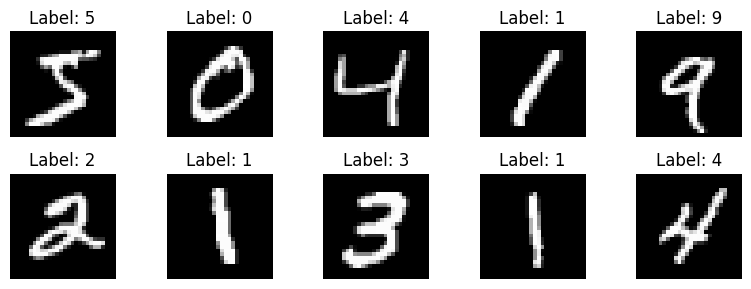

In [3]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## **Preporcessing**

When working with image data, we usually apply a few preprocessing steps to prepare the images for a machine learning model. Images are made up of pixel values, and models perform best when these values are scaled to consistent ranges and arranged in a format the model can understand. Preprocessing ensures that the data is clean, uniform, and ready for efficient training.

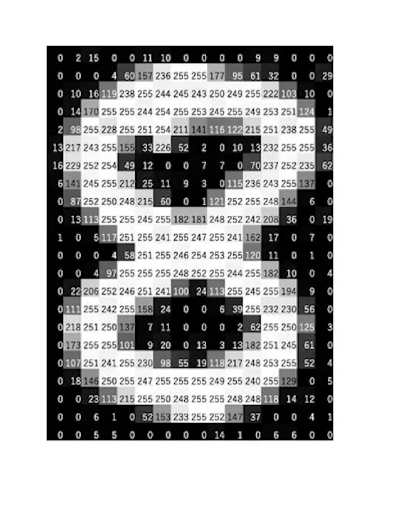

In the MNIST dataset, each image is a handwritten digit stored as a 28×28 grayscale image. Before feeding these images into a neural network, we perform two key preprocessing operations:

**Normalize Pixel Values**

Raw pixel values range from 0 to 255.
By dividing every pixel by 255.0, we scale the data to a range between 0 and 1, which helps the neural network train faster and more reliably.

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

To see the affect of normalization, lets visualize the images again

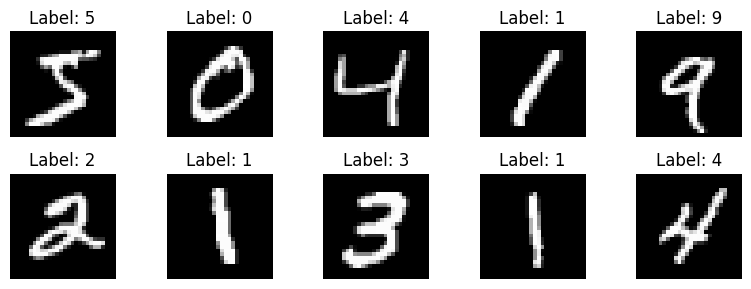

In [5]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

The results show normalization changes numerical values, not the visual appearance of the image. The network benefits from scaled inputs, but humans won't notice any difference in the displayed image.

**Flatten the Image**

Neural networks that use fully connected (Dense) layers expect each input example to be a 1-dimensional vector.
Since each MNIST image is 28×28, we reshape it into a vector of 784 values (28×28 = 784).

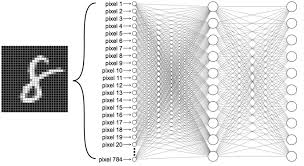

In [6]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print("Normalized + flattened training shape:", x_train.shape)
print("Normalized + flattened test shape:", x_test.shape)

Normalized + flattened training shape: (60000, 784)
Normalized + flattened test shape: (10000, 784)


## **Task 1: Build and Experiment With Neural Network Models**

So far, we have studied how to create a simple neural network using a single-layer perceptron. In this task, you will extend those ideas by building and comparing multiple neural network architectures.

Your goal is to create **at least three different models**, each with a meaningful modification.  
Possible modifications include (but are not limited to):

- Adding additional Dense layers  
- Changing the number of neurons in layers  
- Trying different activation functions  
- Adjusting the learning rate or optimizer   

For **each model**, you must:

1. Define the architecture  
2. Train the model (use the same number of epochs for fairness)  
3. Evaluate the model using appropriate evaluation measures on the test set  
4. Briefly explain what you changed and why  

After testing all your models, identify which one performs the best and save that model using:

```python
model.save("best_model.h5")
```

BASELINE MODEL , NOTHING SPECIAL
• Single hidden layer
• Uses Sigmoid (slower but educational)

In [7]:
model1 = Sequential([
    Dense(64, activation="sigmoid", input_shape=(784,)),
    Dense(10, activation="softmax")
])

model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model1.fit(x_train, y_train, epochs=10,
                      validation_data=(x_test, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8200 - loss: 0.7675 - val_accuracy: 0.9269 - val_loss: 0.2539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9316 - loss: 0.2438 - val_accuracy: 0.9454 - val_loss: 0.1934
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9499 - loss: 0.1797 - val_accuracy: 0.9516 - val_loss: 0.1599
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9609 - loss: 0.1401 - val_accuracy: 0.9595 - val_loss: 0.1370
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9661 - loss: 0.1206 - val_accuracy: 0.9644 - val_loss: 0.1251
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9719 - loss: 0.1005 - val_accuracy: 0.9633 - val_loss: 0.1170
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9749 - loss: 0.0887 - val_accuracy: 0.9676 - val_loss: 0.1047
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0753 - 

\Add Dropout to Avoid Overfitting
• Two hidden layers
• ReLU + Dropout

In [8]:
model2 = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dropout(0.3),                     # randomly drop 30% neurons
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model2.fit(x_train, y_train, epochs=10,
                      validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8510 - loss: 0.4847 - val_accuracy: 0.9643 - val_loss: 0.1111
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9548 - loss: 0.1514 - val_accuracy: 0.9711 - val_loss: 0.0932
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9666 - loss: 0.1082 - val_accuracy: 0.9766 - val_loss: 0.0765
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9705 - loss: 0.0972 - val_accuracy: 0.9761 - val_loss: 0.0765
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9745 - loss: 0.0794 - val_accuracy: 0.9799 - val_loss: 0.0731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9757 - loss: 0.0768 - val_accuracy: 0.9795 - val_loss: 0.0735
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9788 - loss: 0.0672 - val_accuracy: 0.9800 - val_loss: 0.0674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9826 - loss: 0

Very Wide Network With Lower LR
MAny neurons
Lower learning rate for stability

In [9]:
model3 = Sequential([
    Dense(512, activation="relu", input_shape=(784,)),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])

# slower learning → better convergence for huge layers
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)

model3.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history3 = model3.fit(x_train, y_train, epochs=10,
                      validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8959 - loss: 0.3563 - val_accuracy: 0.9721 - val_loss: 0.0915
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9745 - loss: 0.0826 - val_accuracy: 0.9715 - val_loss: 0.0967
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9847 - loss: 0.0486 - val_accuracy: 0.9727 - val_loss: 0.0874
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9894 - loss: 0.0349 - val_accuracy: 0.9797 - val_loss: 0.0685
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9909 - loss: 0.0257 - val_accuracy: 0.9794 - val_loss: 0.0784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9927 - loss: 0.0216 - val_accuracy: 0.9781 - val_loss: 0.0755
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.9779 - val_loss: 0.0895
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9956 -

In [10]:
acc1 = model1.evaluate(x_test, y_test, verbose=0)[1]
acc2 = model2.evaluate(x_test, y_test, verbose=0)[1]
acc3 = model3.evaluate(x_test, y_test, verbose=0)[1]

print("Model 1 Accuracy:", acc1)
print("Model 2 Accuracy:", acc2)
print("Model 3 Accuracy:", acc3)


Model 1 Accuracy: 0.9708999991416931
Model 2 Accuracy: 0.9811999797821045
Model 3 Accuracy: 0.9771000146865845


In [11]:
best_acc = max(acc1, acc2, acc3)

if best_acc == acc1:
    best_model = model1
    print("Best Model = Model 1")
elif best_acc == acc2:
    best_model = model2
    print("Best Model = Model 2")
else:
    best_model = model3
    print("Best Model = Model 3")

best_model.save("best_model.h5")
print("Saved as best_model.h5")


Best Model = Model 2
Saved as best_model.h5


## **Task 2: Integrate Your Model Into a Streamlit Application**

In this task, you will deploy your best-performing MNIST model in a simple web application using Streamlit. The goal is to make your model interactive and testable with user input.

Your Streamlit app should:

1. Load your saved model.  
2. Allow the user to upload a small handwritten image.  
3. Preprocess the input (resize to 28×28, grayscale, normalize, flatten if necessary).  
4. Predict the digit using your trained model.  
5. Display the predicted number on the web page.  

ModuleNotFoundError: No module named 'streamlit'

## **Submission Requirements**

- Jupyter notebook showing model training.
- Best saved model.  
- Python file for your Streamlit app.
- Screenshot of the front-end app showing your app interface.  
- Screenshot showing the model prediction when you upload your own image.

Make your quiz interactive and interesting feel free to experiment with different neural network architectures, visualizations, or additional features.  
Focus on learning and understanding, not just the final accuracy.  
Document your work clearly so that your code, results, and explanations are easy to follow.  
Have fun testing your model in a Streamlit application and seeing your neural network recognize handwritten digits in real time!  

**Good luck!**